## 国家统计局：第六次人口普查数据爬取与可视化分析

### 链接
http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/indexch.htm

### 引入相关库

In [1]:
import csv
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from Spider.tool import Spider
%matplotlib inline

### 获取网页源代码

#### 这里的访问默认设置了1-10s的随机delay

In [2]:
sp = Spider()
sp.get_html('http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/left.htm', encoding='gbk')
soup = BeautifulSoup(sp.html, 'lxml')

状态码: 200


### 通过BeautifulSoup，利用正则表达式爬取第六次人口普查的所有数据链接，并写入文件data_link

In [3]:
data_list = soup.find_all(href=re.compile('html/[AB](.*?).htm'))
with open('data_link.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    writer.writerow(['title', 'data_link'])
for i in data_list:
    title = i.text
    link = 'http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/'+i['href']
    with open('data_link.csv', 'a', encoding='utf8') as f:
        writer = csv.writer(f)
        writer.writerow([title, link])

### 读取文件，并查看

In [4]:
data = pd.read_csv('data_link.csv')
data.head(10)

title  \
0            1-1  各地区户数、人口数和性别比   
1       1-1a  各地区户数、人口数和性别比(城市)   
2        1-1b  各地区户数、人口数和性别比(镇)   
3       1-1c  各地区户数、人口数和性别比(乡村)   
4         1-2  各地区分性别、户口登记状况的人口   
5    1-2a  各地区分性别、户口登记状况的人口(城市)   
6     1-2b  各地区分性别、户口登记状况的人口(镇)   
7    1-2c  各地区分性别、户口登记状况的人口(乡村)   
8            1-3  各地区分性别的户籍人口状况   
9  1-4  各地区分性别的户口登记地在外乡镇街道的人口状况   

                                           data_link  
0  http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/htm...  
1  http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/htm...  
2  http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/htm...  
3  http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/htm...  
4  http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/htm...  
5  http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/htm...  
6  http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/htm...  
7  http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/htm...  
8  http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/htm...  
9  http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/htm...

### 这里选择其中的一个链接进行数据集爬取

### 链接：
http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/html/A0202.htm

In [5]:
url = data.iloc[48, 1]
sp.get_html(url, encoding='gbk')
soup = BeautifulSoup(sp.html, 'lxml')

状态码: 200


### 写入文件study.csv，这里先手动写入列名

In [6]:
with open('study.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    writer.writerow(['', '6岁及以上人口', '6岁及以上人口', '6岁及以上人口', '未上过学', '未上过学', '未上过学',
                     '小学', '小学', '小学', '初中', '初中', '初中', '高中', '高中', '高中', '大学专科', '大学专科',
                     '大学专科', '大学本科', '大学本科', '大学本科', '研究生', '研究生', '研究生'])
    writer.writerow(['', '合计', '男', '女', '小计', '男', '女', '小计', '男', '女', '小计', '男', '女',
                     '小计', '男', '女', '小计', '男', '女', '小计', '男', '女', '小计', '男', '女'])

### 第一行的源码节点规律和其他的不一样，单独写入

In [7]:
add_up = soup.find_all(class_='xl251001')
add_list = ['总计']
for i in add_up:
    add_list.append(i.text)

### 剩余数据的爬取和写入

In [8]:
# 所有的索引
add_up = soup.find_all(class_='xl391001')
index = []
for i in add_up:
    index.append(i.text.replace('\xa0', ''))
# 剩余所有数据
add_up = soup.find_all(class_='xl241001')
num = []
for i in add_up:
    num.append(i.text)

In [9]:
# 将索引和数据合成二维数组
text = np.concatenate([np.array(index).reshape(-1, 1), np.array(num).reshape(57, 24)], axis=1)
# 写入文件
with open('study.csv', 'a', encoding='utf8') as f:
    writer = csv.writer(f)
    writer.writerow(add_list)
    writer.writerows(text)

### 查看数据

In [10]:
# 这里设置了多层索引(原网页也是)
data = pd.read_csv('study.csv', index_col=0, header=[0, 1])
data.index.name = '民族'
data.head()

6岁及以上人口                            未上过学                      \
             合计          男          女        小计         男         女   
民族                                                                    
总计   1242546122  633278387  609267735  62136405  17503480  44632925   
汉 族  1140804980  581418089  559386891  53726722  14694341  39032381   
蒙古族     5493484    2743974    2749510    181845     63382    118463   
回 族     9684824    4893795    4791029    829803    275687    554116   
藏 族     5652093    2832661    2819432   1727358    708508   1018850   

            小学                               初中  ...        高中      大学专科  \
            小计          男          女         小计  ...         女        小计   
民族                                               ...                       
总计   357211733  168297261  188914472  518176222  ...  82639775  68610519   
汉 族  317175239  148530432  168644807  482244975  ...  78066375  64353701   
蒙古族    1576111     762213     813898    2092137  ...    419728    420682   
回 族    3451225    1704686    1746539    3256837  ...    582926    504660   
藏 族    2593670    1382432    1211238     751132  ...    125293    192834   

                             大学本科                          研究生             \
            男         女        小计         男         女       小计          男   
民族                                                                          
总计   36870375  31740144  45625793  25217083  20408710  4138585  2351251.0   
汉 族  34615454  29738247  42822692  23751428  19071264  3955659  2258424.0   
蒙古族    210393    210289    335274    161396    173878    26536    11357.0   
回 族    254277    250383    371555    188223    183332    30222    15087.0   
藏 族    102975     89859    111515     57078     54437     4964     3045.0   

                
             女  
民族              
总计   1787334.0  
汉 族  1697235.0  
蒙古族    15179.0  
回 族    15135.0  
藏 族     1919.0  

[5 rows x 24 columns]

### 引入模块绘图

In [11]:
import seaborn as sns
# 设置中文
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']}) 

### 这里选取部分数据

In [12]:
df1 = data.iloc[:, ::3].copy()
col = []
for i in df1.columns:
    col.append(i[0])
col
df1.columns=col
df1 = df1.drop(['总计'])
df1 = df1.drop(['6岁及以上人口'], axis=1)
col.remove('6岁及以上人口')

### 画出各民族的学历所占比例

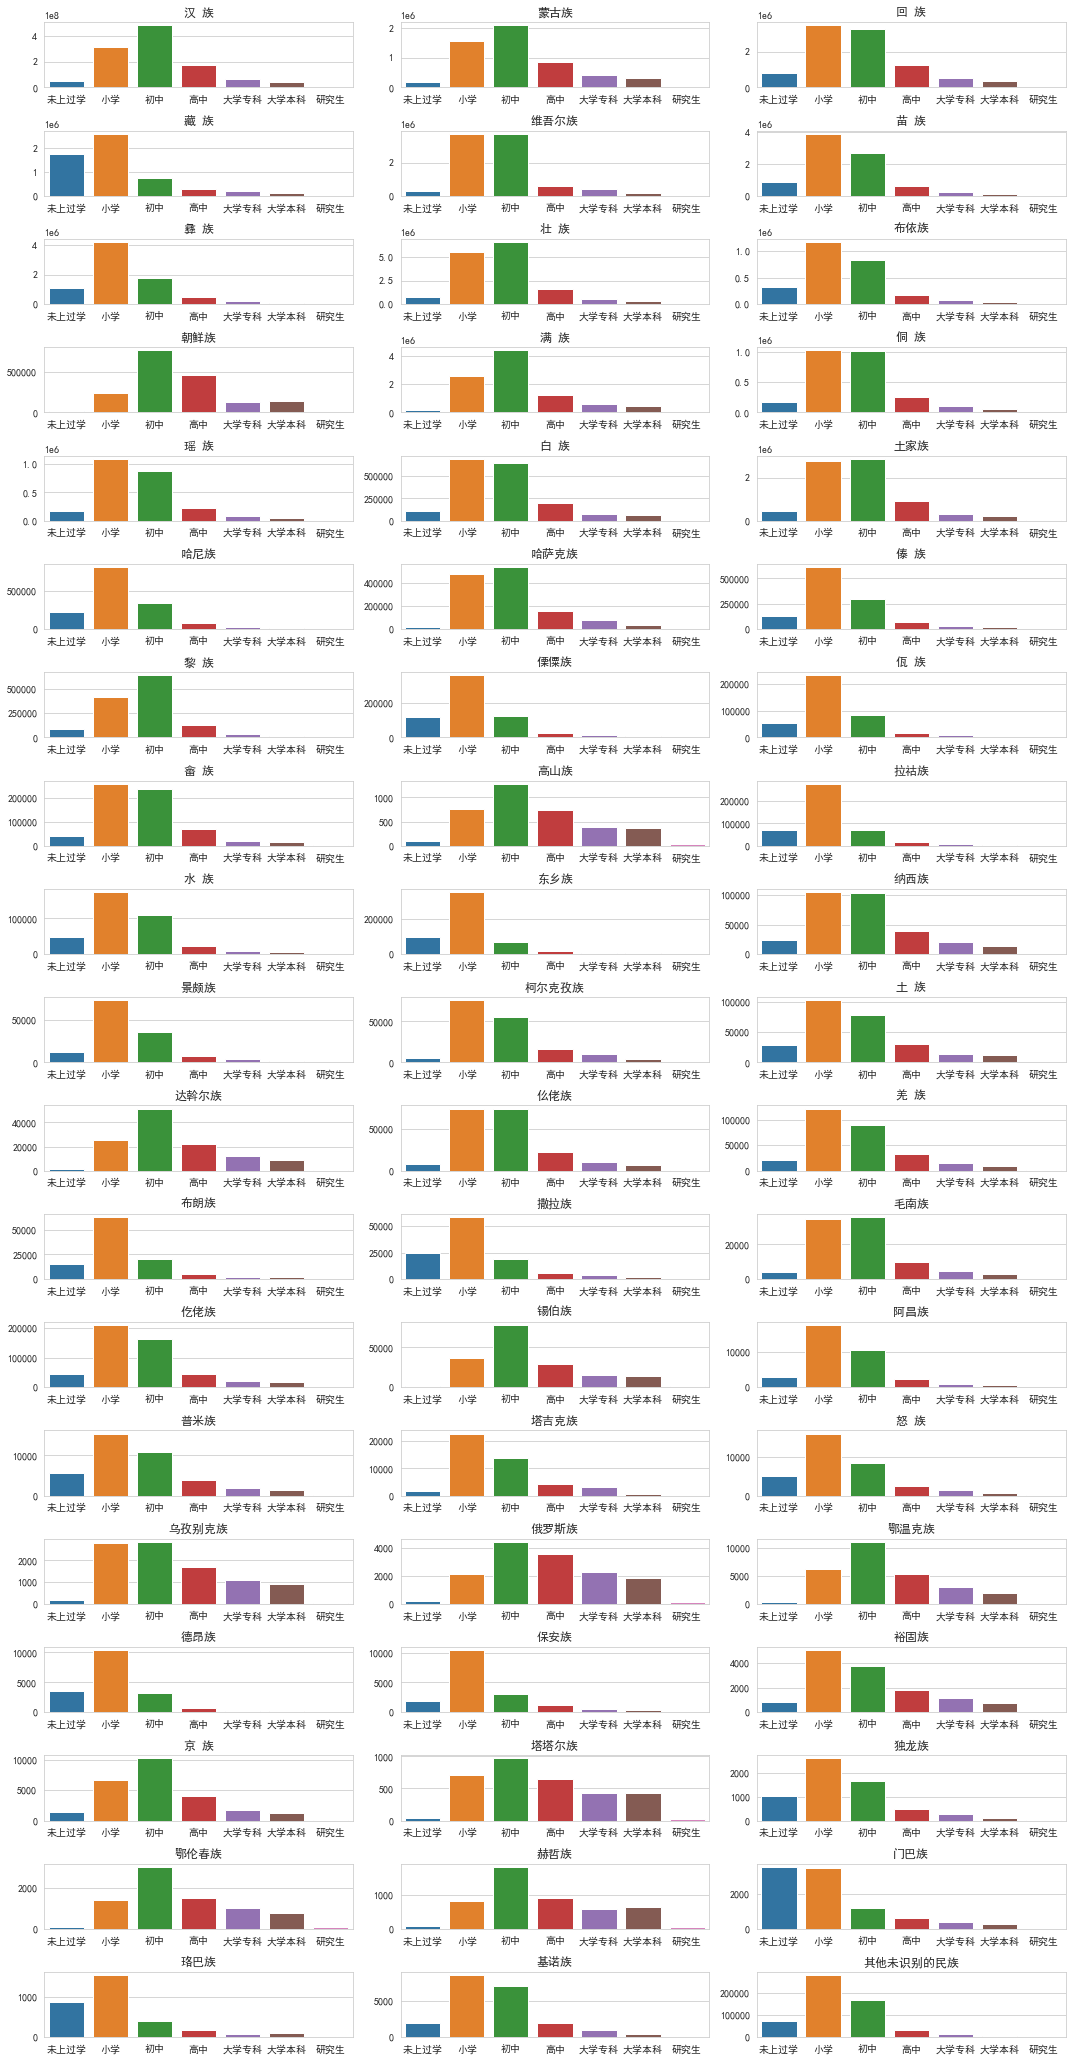

In [13]:
fig = plt.figure(figsize=(15, 30))
for i in range(57):
    ax = fig.add_subplot(20, 3, i+1)
    sns.barplot(data=df1.iloc[[i]])
    ax.set_title(df1.index[i])
fig.tight_layout()

### 经图分析可知
- 绝大数的民族学历都集中分布在初中和高中
- 藏族、门巴族和珞巴族未上过学的人口比例比较大
- 朝鲜族和锡伯族未上过学的人口比例最少
- 高山族、乌孜别克族、俄罗斯族、鄂温克族、塔塔尔族、鄂伦春族和赫哲族的高学历人口比例较大
- 鄂伦春族、赫哲族、塔塔尔族和俄罗斯族研究生学历比较大

### 画出学历分布热力图

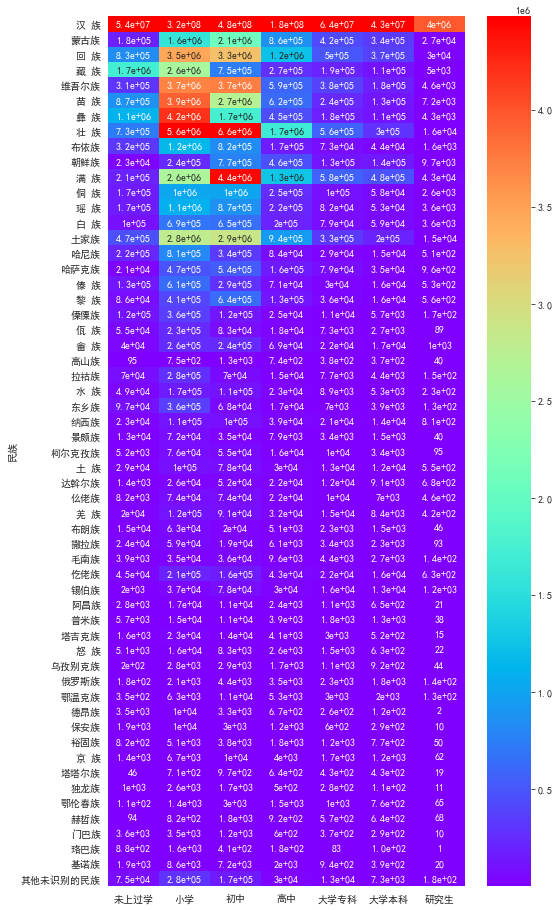

In [14]:
fig = plt.figure(figsize=(8, 16))
ax = sns.heatmap(df1, cmap='rainbow', robust=True, annot=True)

### 可以看出这里是人口数起了主导作用
### 现在每一行除以总数，得到各民族学历分布比例数据，再次绘图

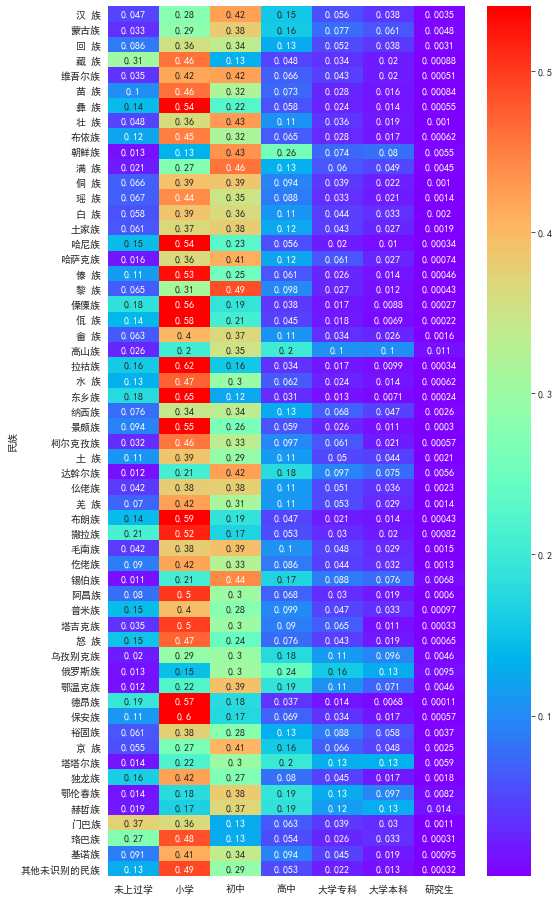

In [15]:
df2 = df1.apply(lambda x : x / df1.sum(axis=1))
fig = plt.figure(figsize=(8, 16))
ax = sns.heatmap(df2, cmap='rainbow', robust=True, annot=True)

### 再次得出结论：我国各民族人民的学历主要分布在初中和高中

## 下面采用plotly绘图，提高用户交互性

In [16]:
# 模块引入
import plotly.express as px

### 绘制各民族学历分布的饼状图

In [17]:
# 这里通过修改i（在[0, 56]的范围）的值，可以画出不同民族的饼状图，由于篇幅问题只画了一幅图
i = 0
fig = px.pie(df1, values=df1.iloc[i], names=col, title=df1.index[i])
fig.show()

### 画出各民族学历分布热力图

In [18]:
px.density_heatmap(df2, x=col,  y=df1.index, marginal_x='histogram', marginal_y='box', width=800, height=1000)

### 各民族学历分布的直方图

In [19]:
# 可根据需要放大查看不同的民族
px.histogram(df1, x=df1.index, y=col)